# Health Analysis

In [24]:
%run analysis_functions.ipynb

In [25]:
df, arguments = read_clean_data()
sheet_id = arguments["sheet_id"]
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}"

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Cervical mucus charting

In [30]:
chart = chart_cervical_mucus(
    df,
    with_text=False,
    outfile="charting",
)

### ![](charting.png)

In [5]:
chart = chart_cervical_mucus(
    df,
    with_text=True,
    outfile="charting_with_text",
)

### ![](charting_with_text.png)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Symptoms snapshot

In [31]:
numeric_metrics = [
    "BMs",
    "previous night Oura score",
    "steps",
]

categorical_metrics = [
    "pelvic pain",
    "stomach pain",
    "fatigue",
    "headache",
    "uncomfortable stomach",
    "visibly bloated stomach",
    "diarrhea",
    "nauseous",
    "white clouds in urine",
]

#### Last month

In [32]:
# last N days, excluding most recent, incomplete day
last_n_days = 30
start_dt = df[- last_n_days - 1: -1].index.min()
end_dt = df[- last_n_days - 1: -1].index.max()
min_pain = 3

summary = generate_summary(
    df,
    start_dt,
    end_dt,
    categorical_metrics,
    numeric_metrics,
    min_pain=min_pain,
)
print(summary)

01/10/24 - 02/08/24

93% of days had pelvic pain at least 3 / 10.
90% of days had visibly bloated stomach.
87% of days had fatigue.
80% of days had stomach pain at least 3 / 10.
80% of days had headache.
73% of days had uncomfortable stomach.
50% of days had white clouds in urine.
37% of days had diarrhea.
23% of days had nausea.

4 BMs / day
87 / 100 sleep score
9,842 steps / day



In [33]:
# Right before second surgery
start_dt = datetime.datetime(2023, 9, 1)
end_dt = datetime.datetime(2023, 9, 26)

<hr style="height:2px;border-width:0;color:black;background-color:black">

## Medications

#### Yesterday

In [26]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 1

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

02/10/24

40 mg Omeprazole / day
10 mg THC / day
10 mg CBD / day
250 mg Vitamin B / day
25 mg DHEA / day
50 mg Pycnogenol / day
30 mg Zinc / day
2000 mg Vitamin C / day
1000 mcg Vitamin B / day
2000 IU Vitamin D / day



#### Last month

In [27]:
# second to last day, since today likely isn't over yet
end_dt = df.index[-2]
n_days = 30

summary = generate_med_summary(
    df,
    end_dt,
    n_days,
)
print(summary)

01/12/24 - 02/10/24

37 mg Omeprazole / day
13 mg THC / day
13 mg CBD / day
667 mg fish oil / day
250 mg Vitamin B / day
25 mg DHEA / day
50 mg Pycnogenol / day
7 mg Zinc / day
2 mg Esomeprazole / day
467 mg Vitamin C / day
1000 mcg Vitamin B / day
2000 IU Vitamin D / day



#### Over time

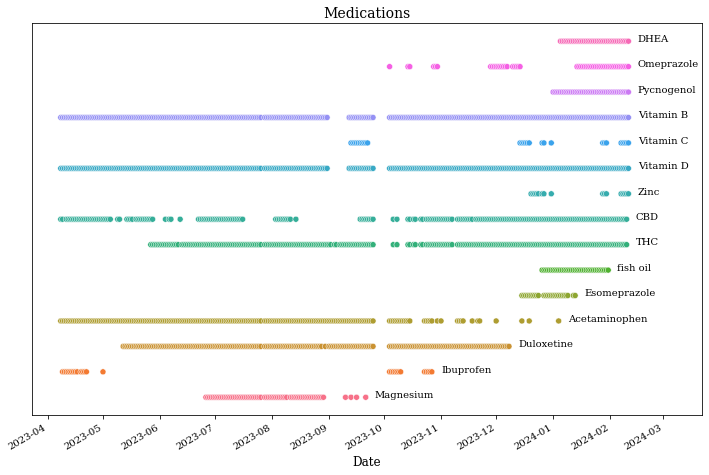

In [28]:
plot_meds_over_time(df)